<a href="https://colab.research.google.com/github/aujasvit/Transformers/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode = 'coarse')
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0

2. Check if there are 20 labels in y_train using np.unique().

In [ ]:
import numpy as np
import pandas as pd
print(f"Number of unique labels = {len(np.unique(y_train))}")

Number of unique labels = 20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]


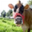


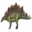


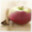


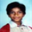


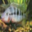


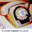


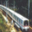


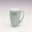


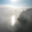


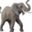


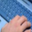


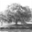


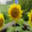


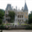


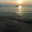


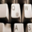


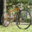


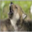


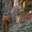


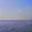


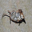


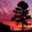


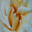


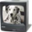


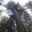

In [ ]:
import plotly.express as px
for i in range(25):
  fig = px.imshow(x_train[i])
  fig.show()



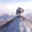


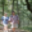


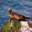


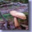


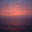


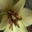


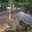


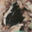


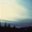


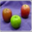


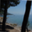


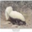


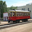


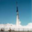


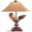


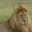


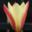


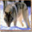


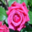


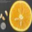


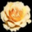


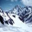


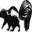


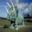


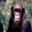

In [ ]:
import plotly.express as px
for i in range(25):
  fig = px.imshow(x_test[i])
  fig.show()


Import layers and models from tensorflow.keras and build a Sequential

---

Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes with CPU. With GPU, took less than a minute !!

You should come up with your own architecture.

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape = (32, 32, 3)),
        layers.Conv2D(32, 3, padding = 'valid', activation = 'relu'),
        layers.Conv2D(64, 3, padding = 'valid', activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(64, 3, activation = 'relu'),
        layers.Conv2D(64, 3, activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(80, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(40, activation = 'relu'),
        layers.Dense(20, activation = 'softmax'),
    ]
)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(lr = 0.0001),
    metrics = ['accuracy'],
)

Plot the training accuracy vs number of epochs graph. Print the test accuracy.

Epoch 1/10
782/782 - 9s - loss: 2.5626 - accuracy: 0.1990 - 9s/epoch - 12ms/step
Epoch 2/10
782/782 - 5s - loss: 2.1699 - accuracy: 0.3265 - 5s/epoch - 6ms/step
Epoch 3/10
782/782 - 5s - loss: 1.9659 - accuracy: 0.3857 - 5s/epoch - 6ms/step
Epoch 4/10
782/782 - 5s - loss: 1.8038 - accuracy: 0.4357 - 5s/epoch - 6ms/step
Epoch 5/10
782/782 - 5s - loss: 1.6737 - accuracy: 0.4726 - 5s/epoch - 6ms/step
Epoch 6/10
782/782 - 6s - loss: 1.5701 - accuracy: 0.5022 - 6s/epoch - 7ms/step
Epoch 7/10
782/782 - 5s - loss: 1.4679 - accuracy: 0.5326 - 5s/epoch - 6ms/step
Epoch 8/10
782/782 - 6s - loss: 1.3879 - accuracy: 0.5563 - 6s/epoch - 7ms/step
Epoch 9/10
782/782 - 5s - loss: 1.3153 - accuracy: 0.5793 - 5s/epoch - 6ms/step
Epoch 10/10
782/782 - 4s - loss: 1.2491 - accuracy: 0.6001 - 4s/epoch - 6ms/step


[]

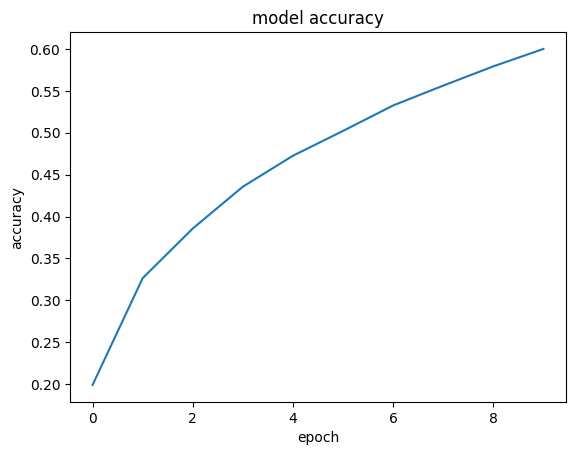

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6539 - accuracy: 0.4935


[1.6539218425750732, 0.4934999942779541]

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.


It overfitted my training data (84% accuracy) and gave 51% accuracy in test data. Can you do better?


In [ ]:
model2 = keras.Sequential(
    [
        keras.Input(shape = (32, 32, 3)),
        layers.Conv2D(64, 7, strides = (2,2), padding = 'same', kernel_regularizer = regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Activation(keras.activations.relu),
        layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
        layers.Conv2D(64, 3, strides = (1,1), padding = 'same'),
        layers.BatchNormalization(),
        layers.Activation(keras.activations.relu),
        layers.Conv2D(128, 3, strides = (1,1), padding = 'same'),
        layers.BatchNormalization(),
        layers.Activation(keras.activations.relu),
        layers.Conv2D(256, 3, strides = (1,1), padding = 'same'),
        layers.BatchNormalization(),
        layers.Activation(keras.activations.relu),
        layers.Conv2D(512, 3, strides = (1,1), padding = 'same'),
        layers.BatchNormalization(),
        layers.Activation(keras.activations.relu),
        layers.GlobalAveragePooling2D(),
        layers.Flatten(),
        layers.Dense(20, activation = 'softmax')
    ]
)

model2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(lr = 0.0001),
    metrics = ['accuracy'],
)

Epoch 1/10
782/782 - 11s - loss: 2.2389 - accuracy: 0.3222 - 11s/epoch - 14ms/step
Epoch 2/10
782/782 - 7s - loss: 1.8534 - accuracy: 0.4348 - 7s/epoch - 8ms/step
Epoch 3/10
782/782 - 7s - loss: 1.6595 - accuracy: 0.4903 - 7s/epoch - 9ms/step
Epoch 4/10
782/782 - 7s - loss: 1.5150 - accuracy: 0.5364 - 7s/epoch - 9ms/step
Epoch 5/10
782/782 - 7s - loss: 1.4003 - accuracy: 0.5735 - 7s/epoch - 8ms/step
Epoch 6/10
782/782 - 7s - loss: 1.2918 - accuracy: 0.6059 - 7s/epoch - 9ms/step
Epoch 7/10
782/782 - 6s - loss: 1.2012 - accuracy: 0.6346 - 6s/epoch - 8ms/step
Epoch 8/10
782/782 - 7s - loss: 1.1042 - accuracy: 0.6660 - 7s/epoch - 9ms/step
Epoch 9/10
782/782 - 6s - loss: 1.0275 - accuracy: 0.6912 - 6s/epoch - 8ms/step
Epoch 10/10
782/782 - 7s - loss: 0.9315 - accuracy: 0.7208 - 7s/epoch - 9ms/step


[]

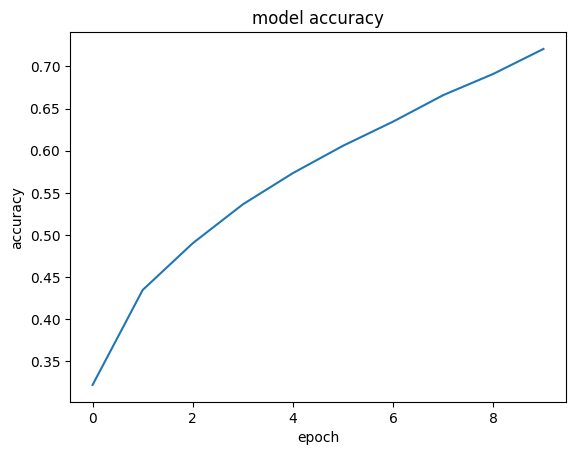

In [ ]:
import matplotlib.pyplot as plt

history2 = model2.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)

plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot()

In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.7521 - accuracy: 0.5298


[1.752143144607544, 0.5297999978065491]

# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [ ]:
dataset = dataset.drop(['Car Name'], axis = 1)
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [ ]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
dataset = pd.get_dummies(dataset, columns = ['Origin',])

In [ ]:
# Separate the target variable from the features in the dataset.
out = dataset['MPG']
dataset = dataset.drop(['MPG'],axis = 1)

In [ ]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, out, test_size = 0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(294, 9) (98, 9) (294,) (98,)


#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
"""
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

You may have given different name to your train and test data.
"""

'\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\nYou may have given different name to your train and test data.\n'

In [ ]:
print(np.array(y_train).reshape(-1, 1).shape)

(294, 1)


# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar100

model = tf.keras.models.Sequential([
    layers.Dense(128),
    layers.Dense(64),
    layers.Dense(10),
    layers.Dense(1)
])
y_train_new = np.array(y_train).reshape(-1, 1)

# print(model.predict(x_train[:10]) - y_train_new[:10])
model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(lr = 0.1),
)
# y_train_new = np.array(y_train).reshape(-1, 1)
history = model.fit(np.array(x_train), y_train_new , epochs=100, batch_size=64, verbose=1)


Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 616.7424
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 590.2499
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 569.0731
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 558.0822
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 543.7378
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 529.6683
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 511.4924
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 489.7254
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 463.1731
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 429.8802
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 386.7823
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 332.0919
Epoch 13/100
5/5 [===================

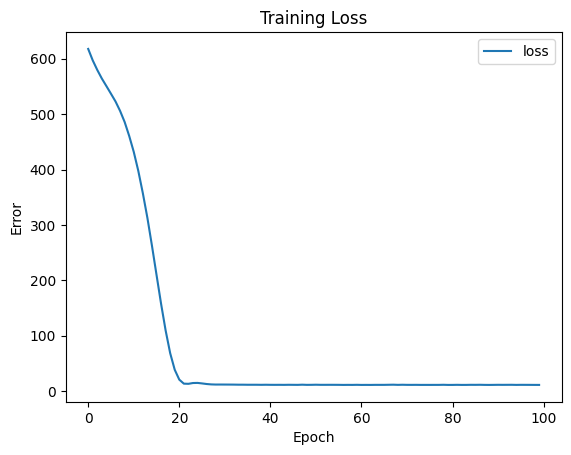

In [ ]:
#Plot the Loss from the history..
import matplotlib
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 13.2272


13.227160453796387